## Fundamentals of Data Analysis - Project ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

This project sets out to analyse the data points and variables within Fisher's Iris Dataset. For each variable, the focus will be on the classifcation of the variable according to it's type as represented in Python code, utilising appropriate summary statistics to analyse the variable and displaying variables using the most appropriate plots.

I am using Visual Studio Code (VS Code) (version 1.85.1) to write my project and to upload it to my repository on GitHub for assessment. I am also using Jupyter code cells within VS Code.

This file will firstly give some background information to the dataset in question. 

I will then outline the steps which I needed to take before I could begin the actual analysis itself: downloading the dataset, preparing the dataset by adding the correct headings, and importing the modules, libraries and packages which I used to complete the project.

Next, I will outline some summary statistics relating to the variables within the dataset. In addition to the summary statistics generated by the .describe() method, I calculated, for the dataset as a whole, figures for coefficient of variation and skewness. I also calculated the correlation coefficients for the six possible pairs of traits. I have included a description of these statistics in the 'Summary of each variable' section and my interpretation of the results. My script will redirect these summary statistics for each of the four variables (ie. traits) on to a text file.

I will then carry out data visualisation on the Iris dataset, using histograms and scatterplots. My script will save each plot generated from the data as a .png file and these can be viewed below. I will discuss my interpretations of the histograms and scatterplots.

My project will conclude with an overall summary of my findings and my thoughts upon conclusion of the project. I will also provide a list of references (using APA reference style) which I used to complete my work.


### Background of dataset ###

The data set was collected in 1935 by the American botanist Edgar Anderson and used in 1936 by the British statistician and biologist Ronald A. Fisher. It relates to data collected from samples of three species of the Iris flowering plant genus: Iris setosa, Iris virginica, and Iris versicolor. \
It is commonly used as an introductory data set by people who are learning how to analyse and visualise data using programming languages.

Fifty samples were collected for each species, giving one hundred and fifty samples in total. \
For each sample, four features of the flower were measured; these were: sepal length, sepal width, petal length and petal width. These attributes of the samples are contained in columns 1, 2, 3 and 4 respectively within the dataset. The species name of the flower is also included in the dataset in column 5.

The petal of a flowering plant are the leaves of the flower which surround the reproductive parts of the flower, and which are often brightly coloured to attract pollinators. Sepals usually protect the flower when it is in a bud and structurally support the petals when the flower is in bloom.

The below is an image of the three flowers analysed in the dataset, along with a label for the sepal and petal of one of the three flower species (Iris Versicolor):

![image](https://raw.githubusercontent.com/jmce22/pands-project/main/iris_flowers.png)

### Pre-analysis ###

I downloaded the Iris dataset from https://archive.ics.uci.edu/ml/datasets/iris. I saved it as a .csv file into the folder where my I worked on my project. There were no headings for the data when I opened the dataset; however, the site which I downloaded the data from did provide the information about what each of the five columns in the dataset represents. I used this to add the headings to the data so I could manipulate it.

The headings for the five columns were given as below:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris setosa
* Iris versicolour
* Iris virginica

To enable me to analyse the dataset, I will import some libraries and modules commonly used for this purpose:

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 

These libraries are as follows:

* *Matplotlib* is a library used by Python to make plots and graphs. It requires NumPy to run. *Matplotlib.pyplot* is a collection functions which allows us to do different things to the plots we make, such as create them, add headings, change the colour scheme etc.

* *NumPy* (Numerical Python) is a package used in Python to carry out mathematical operations on numerical datatypes, such as integers and floating-point numbers. It creates multi-dimensional array objects which allow Python to carry out mathematical operations much more efficiently than would be the case in Python without NumPy. 

* *pandas* is built on top on NumPy and is a powerful and flexible Python package used for data analysis, especially of tabular data, such as the data in the .csv file used for this project. I used pandas to open the Iris dataset. Pandas creates data-structures which allow data to be manipulated, with the most important being 1-dimensional data 'series' and 2-dimensional 'DataFrames' (the structure which is used here to manipulate the Iris data). The DataFrame in pandas stores data as a two-dimensional structure where each piece of information has a row and column label.

* *Seaborn* is built on top of matplotlib. It enables us to make more appealing plots, utilising different styles.

* *Scikit Learn* is

Next, I will create a pandas DataFrame object to use in my analysis. I will do this by reading the .csv file with pandas and assigning names to each column, based on the information available on the website I downloaded the .csv file from:

In [33]:
df = pd.read_csv("data/iris.data.csv", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'variety'])

We can get a sense of what information is contained within the dataset by printing out the first five and last five rows from it:

In [34]:
print(df)

     sepal length  sepal width  petal length  petal width         variety
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


It will also be useful to create sub-dataframes from the overall dataframe, filtered by each of the three Iris flowers:

In [35]:
df_setosa = df[df['variety'] == 'Iris-setosa']
df_versicolor = df[df['variety'] == 'Iris-versicolor']
df_virginica = df[df['variety'] == 'Iris-virginica']

### Variable types in data set ###

Fisher's Iris dataset consists of five variables: sepal length, sepal width, petal length, petal width and the variety of the Iris flower. To determine what "type" Python classifies each variable as, we can use the function df.dtypes:

In [36]:
print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
variety          object
dtype: object


We find that each of the numerical variables are classified as floating point numbers. Additionally, we know that each of these four variables are *ratio* variables as opposed to *interval* variables; for a ration variable, a value of zero corresponds to an absence of that variable, while for an interval variable, a value of zero can be just a point on the scale of measurement.

### Summary statistics ###

In [37]:
summary_stats = df.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count      mean       std  min  25%   50%  75%  max
sepal length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


It is notable that among the full dataset, petal width ranges from a minimum of 0.1 millimetres to a maximum of 2.5 milimetres.

We can get a better sense of the characteristics of each species by printing summary statistics for each one:

*Setosa:*

In [38]:
summary_stats = df_setosa.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%  50%    75%  max
sepal length   50.0  5.006  0.352490  4.3  4.800  5.0  5.200  5.8
sepal width    50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
petal length   50.0  1.464  0.173511  1.0  1.400  1.5  1.575  1.9
petal width    50.0  0.244  0.107210  0.1  0.200  0.2  0.300  0.6


*Versicolor:*

In [39]:
summary_stats = df_versicolor.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%   50%  75%  max
sepal length   50.0  5.936  0.516171  4.9  5.600  5.90  6.3  7.0
sepal width    50.0  2.770  0.313798  2.0  2.525  2.80  3.0  3.4
petal length   50.0  4.260  0.469911  3.0  4.000  4.35  4.6  5.1
petal width    50.0  1.326  0.197753  1.0  1.200  1.30  1.5  1.8


*Virginica:*

In [40]:
summary_stats = df_virginica.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%   50%    75%  max
sepal length   50.0  6.588  0.635880  4.9  6.225  6.50  6.900  7.9
sepal width    50.0  2.974  0.322497  2.2  2.800  3.00  3.175  3.8
petal length   50.0  5.552  0.551895  4.5  5.100  5.55  5.875  6.9
petal width    50.0  2.026  0.274650  1.4  1.800  2.00  2.300  2.5


#### Coefficient of Variation ####
I also want to measure a statistic called the *coefficient of variation*: this measures the relative dispersion of data points in a data series around the mean and is measured by dividing the standard deviation by the mean. 

Firstly we calculate the standard deviation and mean for each variable and then we used these figures to calculate the coefficient of variation:

In [41]:
meansl = df["sepal length"].mean()
sdsl = df["sepal length"].std()
meansw = df["sepal width"].mean()
sdsw = df["sepal width"].std()
meanpl = df["petal length"].mean()
sdpl = df["petal length"].std()
meanpw = df["petal width"].mean()
sdpw = df["petal width"].std()

cov_sl = (sdsl/meansl)
cov_sw = (sdsw/meansw)
cov_pl = (sdpl/meanpl)
cov_pw = (sdpw/meanpw)

# rounding to 2 decimal places
round_cov_sl = round(cov_sl, 2)
round_cov_sw = round(cov_sw, 2)
round_cov_pl = round(cov_pl, 2)
round_cov_pw = round(cov_pw, 2)

print(f'Coefficient of variation of sepal length is = {round_cov_sl}')
print(f'Coefficient of variation of sepal width is = {round_cov_sw}')
print(f'Coefficient of variation of petal length is = {round_cov_pl}')
print(f'Coefficient of vatiation of petal width is  = {round_cov_pw}')

Coefficient of variation of sepal length is = 0.14
Coefficient of variation of sepal width is = 0.14
Coefficient of variation of petal length is = 0.47
Coefficient of vatiation of petal width is  = 0.64


The above figures relate to dataset as a whole. To investigate the cefficient of variation of each of the four traits for each flower, we can use the sub-dataframes created earlier:

*Coefficient of variation of traits in Setosa:*

In [42]:
meansl_setosa = df_setosa["sepal length"].mean()
sdsl_setosa = df_setosa["sepal length"].std()
meansw_setosa= df_setosa["sepal width"].mean()
sdsw_setosa = df_setosa["sepal width"].std()
meanpl_setosa = df_setosa["petal length"].mean()
sdpl_setosa = df_setosa["petal length"].std()
meanpw_setosa = df_setosa["petal width"].mean()
sdpw_setosa = df_setosa["petal width"].std()

cov_sl_setosa = (sdsl_setosa/meansl_setosa)
cov_sw_setosa= (sdsw_setosa/meansw_setosa)
cov_pl_setosa= (sdpl_setosa/meanpl_setosa)
cov_pw_setosa = (sdpw_setosa/meanpw_setosa)

# rounding to 2 decimal places
round_cov_sl_setosa = round(cov_sl_setosa, 2)
round_cov_sw_setosa = round(cov_sw_setosa, 2)
round_cov_pl_setosa = round(cov_pl_setosa, 2)
round_cov_pw_setosa = round(cov_pw_setosa, 2)

print(f'Coefficient of variation of sepal length for Setosa = {round_cov_sl_setosa}')
print(f'Coefficient of variation of sepal width for Setosa = {round_cov_sw_setosa}')
print(f'Coefficient of variation of petal length for Setosa= {round_cov_pl_setosa}')
print(f'Coefficient of variation of petal width for Setosa = {round_cov_pw_setosa}')

Coefficient of variation of sepal length for Setosa = 0.07
Coefficient of variation of sepal width for Setosa = 0.11
Coefficient of variation of petal length for Setosa= 0.12
Coefficient of variation of petal width for Setosa = 0.44


*Coefficient of variation of traits in Versicolor:*

In [43]:
meansl_versicolor = df_versicolor["sepal length"].mean()
sdsl_versicolor = df_versicolor["sepal length"].std()
meansw_versicolor= df_versicolor["sepal width"].mean()
sdsw_versicolor = df_versicolor["sepal width"].std()
meanpl_versicolor = df_versicolor["petal length"].mean()
sdpl_versicolor = df_versicolor["petal length"].std()
meanpw_versicolor = df_versicolor["petal width"].mean()
sdpw_versicolor = df_versicolor["petal width"].std()

cov_sl_versicolor = (sdsl_versicolor/meansl_versicolor)
cov_sw_versicolor = (sdsw_versicolor/meansw_versicolor)
cov_pl_versicolor = (sdpl_versicolor/meanpl_versicolor)
cov_pw_versicolor = (sdpw_versicolor/meanpw_versicolor)

# rounding to 2 decimal places
round_cov_sl_versicolor = round(cov_sl_versicolor, 2)
round_cov_sw_versicolor = round(cov_sw_versicolor, 2)
round_cov_pl_versicolor = round(cov_pl_versicolor, 2)
round_cov_pw_versicolor = round(cov_pw_versicolor, 2)

print(f'Coefficient of variation of sepal length for Versicolor = {round_cov_sl_versicolor}')
print(f'Coefficient of variation of sepal width for Versicolor = {round_cov_sw_versicolor}')
print(f'Coefficient of variation of petal length for Versicolor = {round_cov_pl_versicolor}')
print(f'Coefficient of variation of petal width for Versicolor = {round_cov_pw_versicolor}')

Coefficient of variation of sepal length for Versicolor = 0.09
Coefficient of variation of sepal width for Versicolor = 0.11
Coefficient of variation of petal length for Versicolor = 0.11
Coefficient of variation of petal width for Versicolor = 0.15


*Covariance of traits in Virginica:*

In [44]:
meansl_virginica = df_virginica["sepal length"].mean()
sdsl_virginica = df_virginica["sepal length"].std()
meansw_virginica= df_virginica["sepal width"].mean()
sdsw_virginica = df_virginica["sepal width"].std()
meanpl_virginica = df_virginica["petal length"].mean()
sdpl_virginica = df_virginica["petal length"].std()
meanpw_virginica = df_virginica["petal width"].mean()
sdpw_virginica = df_virginica["petal width"].std()

cov_sl_virginica = (sdsl_virginica/meansl_virginica)
cov_sw_virginica = (sdsw_virginica/meansw_virginica)
cov_pl_virginica = (sdpl_virginica/meanpl_virginica)
cov_pw_virginica = (sdpw_virginica/meanpw_virginica)

# rounding to 2 decimal places
round_cov_sl_virginica = round(cov_sl_virginica, 2)
round_cov_sw_virginica = round(cov_sw_virginica, 2)
round_cov_pl_virginica = round(cov_pl_virginica, 2)
round_cov_pw_virginica = round(cov_pw_virginica, 2)

print(f'Coefficient of variation of sepal length for Virginica = {round_cov_sl_virginica}')
print(f'Coefficient of variation of sepal width for Virginica = {round_cov_sw_virginica}')
print(f'Coefficient of variation of petal length for Virginica = {round_cov_pl_virginica}')
print(f'Coefficient of variation of petal width for Virginica = {round_cov_pw_virginica}')

Coefficient of variation of sepal length for Virginica = 0.1
Coefficient of variation of sepal width for Virginica = 0.11
Coefficient of variation of petal length for Virginica = 0.1
Coefficient of variation of petal width for Virginica = 0.14


We can see that for each species, the figure for coefficient of variation of each of the four measured traits is lower than the figure for coefficient of variation of the four traits among the three species put together ie. there is less variation within a variety than between them.

#### Skewness ####

Skewness measures the degree to which the distribution of the variable deviates from a symmetrical normal distribution.

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" alt="Slight right skew" width = 900, height = 400>

Numerically, skewness can be interpreted as follows:
- a figure of between - 0.5 and 0.5 represents a symmetrical or almost-symmetrical distribution (with 0 representing the normal distribution) 
- a figure of between - 1 and - 0.5 or between 0.5 and 1 represent slight degrees of left and right (negative and positive) skewness respectively
- a figure of less than - 1 or greater than 1 represent extreme left and right skew respectively

In [45]:
skewsl = df["sepal length"].skew()
skewsw = df["sepal width"].skew()
skewpl = df["petal length"].skew()
skewpw = df["petal width"].skew()

round_skewsl = round(skewsl, 2)
round_skewsw = round(skewsw, 2)
round_skewpl = round(skewpl, 2)
round_skewpw = round(skewpw, 2)

print(f'Skewness of sepal length = {round_skewsl}')
print(f'Skewness of sepal width = {round_skewsw}')
print(f'Skewness of petal length  = {round_skewpl}')
print(f'Skewness of petal width = {round_skewpw}')

Skewness of sepal length = 0.31
Skewness of sepal width = 0.33
Skewness of petal length  = -0.27
Skewness of petal width = -0.1


As we did for coefficient of variation, we can calculate the skewness of each measured trait for each species individually:

*Skewness of traits for Setosa:*

In [46]:
skewsl_setosa = df_setosa["sepal length"].skew()
skewsw_setosa = df_setosa["sepal width"].skew()
skewpl_setosa = df_setosa["petal length"].skew()
skewpw_setosa = df_setosa["petal width"].skew()

round_skewsl_setosa = round(skewsl_setosa, 2)
round_skewsw_setosa = round(skewsw_setosa, 2)
round_skewpl_setosa = round(skewpl_setosa, 2)
round_skewpw_setosa = round(skewpw_setosa, 2)

print(f'Skewness of sepal length for setosa = {round_skewsl_setosa}')
print(f'Skewness of sepal width for setosa = {round_skewsw_setosa}')
print(f'Skewness of petal length for setosa = {round_skewpl_setosa}')
print(f'Skewness of petal width for setosa = {round_skewpw_setosa}')

Skewness of sepal length for setosa = 0.12
Skewness of sepal width for setosa = 0.11
Skewness of petal length for setosa = 0.07
Skewness of petal width for setosa = 1.2


*Skewness for Versicolor:*

In [47]:
skewsl_versicolor = df_versicolor["sepal length"].skew()
skewsw_versicolor = df_versicolor["sepal width"].skew()
skewpl_versicolor = df_versicolor["petal length"].skew()
skewpw_versicolor = df_versicolor["petal width"].skew()

round_skewsl_versicolor = round(skewsl_versicolor, 2)
round_skewsw_versicolor = round(skewsw_versicolor, 2)
round_skewpl_versicolor = round(skewpl_versicolor, 2)
round_skewpw_versicolor = round(skewpw_versicolor, 2)

print(f'Skewness of sepal length for versicolor = {round_skewsl_versicolor}')
print(f'Skewness of sepal width for versicolor = {round_skewsw_versicolor}')
print(f'Skewness of petal length for versicolor = {round_skewpl_versicolor}')
print(f'Skewness of petal width for versicolor = {round_skewpw_versicolor}')

Skewness of sepal length for versicolor = 0.11
Skewness of sepal width for versicolor = -0.36
Skewness of petal length for versicolor = -0.61
Skewness of petal width for versicolor = -0.03


*Skewness for Virginica:*

In [48]:
skewsl_virginica = df_virginica["sepal length"].skew()
skewsw_virginica = df_virginica["sepal width"].skew()
skewpl_virginica = df_virginica["petal length"].skew()
skewpw_virginica = df_virginica["petal width"].skew()

round_skewsl_virginica = round(skewsl_virginica, 2)
round_skewsw_virginica= round(skewsw_virginica, 2)
round_skewpl_virginica = round(skewpl_virginica, 2)
round_skewpw_virginica= round(skewpw_virginica, 2)

print(f'Skewness of sepal length for virginica = {round_skewsl_virginica}')
print(f'Skewness of sepal width for virginica = {round_skewsw_virginica}')
print(f'Skewness of petal length for virginica = {round_skewpl_virginica}')
print(f'Skewness of petal width for virginica = {round_skewpw_virginica}')

Skewness of sepal length for virginica = 0.12
Skewness of sepal width for virginica = 0.37
Skewness of petal length for virginica = 0.55
Skewness of petal width for virginica = -0.13


#### Correlation coefficients ####

The Pearson correlation coefficient between two variables is a measure of the strength of the lineaer relationship between the variables. It is represented by the letter 'r' (or rho). It consists of a figure between -1 and 1, and can be interpreted as follows:

- a figure of -1 represents a perfect negative correlation ie. that an increase in x is associated with an exactlty proportional decrease in y, and vice versa
- a figure of between -1 and 0 means that an increase(decrease) in x is associated with a decrease(increase) in y
- a figure of between 0 and 1 represents means that an increase(decrease) in x is associated with an increase(decrease) in y
- a figure of 1 represents a perfect positive correlaton ie. that an increase in x is associated with an exactly proportional increase in y, and a decrease in x is associated with an exactly proportional decrease in y.



<img src = "https://www.scribbr.com/wp-content/uploads/2021/08/01-correlation-types.png" alt="Correlation Coefficient examples" width = 900, height = 400>

The correlation coefficients for the relationships between the six combination of traits, among all of the flowers in the dataset, is as follows:

In [49]:
sl_sw_cc = np.corrcoef(df['sepal length'], df['sepal width'])[0,1]
sl_sw_cc = round(sl_sw_cc, 3)

pl_pw_cc = np.corrcoef(df['petal length'], df['petal width'])[0,1]
pl_pw_cc = round(pl_pw_cc, 3)

sl_pl_cc = np.corrcoef(df['sepal length'], df['petal length'])[0,1]
sl_pl_cc = round(sl_pl_cc, 3)

sw_pw_cc = np.corrcoef(df['sepal width'], df['petal width'])[0,1]
sw_pw_cc = round(sw_pw_cc, 3)

sl_pw_cc = np.corrcoef(df['sepal length'], df['petal width'])[0,1]
sl_pw_cc = round(sl_pw_cc, 3)

sw_pl_cc = np.corrcoef(df['sepal width'], df['petal length'])[0,1]
sw_pl_cc = round(sw_pl_cc, 3)

print("Correlation coefficients for all species: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc)
print("Petal length vs Petal width: ",  pl_pw_cc, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc)
print("Sepal width vs Petal width: ", sw_pw_cc, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc)
print("Sepal width vs Petal length: ",  sw_pl_cc)

Correlation coefficients for all species: 

Sepal length vs Sepal width:  -0.109
Petal length vs Petal width:  0.963 

Sepal length vs Petal length:  0.872
Sepal width vs Petal width:  -0.357 

Sepal length vs Petal width:  0.818
Sepal width vs Petal length:  -0.421


We can see that among the dataset as a whole, there are strong positive correlations between petal length and petal width, sepal length and petal length and between sepeal length and petal width.

The similar figures for each species in isolation is as follows:

*Setosa:*

In [50]:
sl_sw_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['sepal width'])[0,1]
sl_sw_cc_setosa = round(sl_sw_cc_setosa, 3)

pl_pw_cc_setosa = np.corrcoef(df_setosa['petal length'], df_setosa['petal width'])[0,1]
pl_pw_cc_setosa = round(pl_pw_cc_setosa, 3)

sl_pl_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['petal length'])[0,1]
sl_pl_cc_setosa = round(sl_pl_cc_setosa, 3)

sw_pw_cc_setosa = np.corrcoef(df_setosa['sepal width'], df_setosa['petal width'])[0,1]
sw_pw_cc_setosa = round(sw_pw_cc_setosa, 3)

sl_pw_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['petal width'])[0,1]
sl_pw_cc_setosa = round(sl_pw_cc_setosa, 3)

sw_pl_cc_setosa = np.corrcoef(df_setosa['sepal width'], df_setosa['petal length'])[0,1]
sw_pl_cc_setosa = round(sw_pl_cc_setosa, 3)

print("Correlation coefficients for Setosa: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_setosa)
print("Petal length vs Petal width: ",  pl_pw_cc_setosa, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_setosa)
print("Sepal width vs Petal width: ", sw_pw_cc_setosa, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_setosa)
print("Sepal width vs Petal length: ",  sw_pl_cc_setosa)

Correlation coefficients for Setosa: 

Sepal length vs Sepal width:  0.747
Petal length vs Petal width:  0.306 

Sepal length vs Petal length:  0.264
Sepal width vs Petal width:  0.28 

Sepal length vs Petal width:  0.279
Sepal width vs Petal length:  0.177


*Versicolor:*

In [51]:
sl_sw_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['sepal width'])[0,1]
sl_sw_cc_versicolor = round(sl_sw_cc_versicolor, 3)

pl_pw_cc_versicolor = np.corrcoef(df_versicolor['petal length'], df_versicolor['petal width'])[0,1]
pl_pw_cc_versicolor = round(pl_pw_cc_versicolor, 3)

sl_pl_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['petal length'])[0,1]
sl_pl_cc_versicolor = round(sl_pl_cc_versicolor, 3)

sw_pw_cc_versicolor = np.corrcoef(df_versicolor['sepal width'], df_versicolor['petal width'])[0,1]
sw_pw_cc_versicolor = round(sw_pw_cc_versicolor, 3)

sl_pw_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['petal width'])[0,1]
sl_pw_cc_versicolor = round(sl_pw_cc_versicolor, 3)

sw_pl_cc_versicolor = np.corrcoef(df_versicolor['sepal width'], df_versicolor['petal length'])[0,1]
sw_pl_cc_versicolor = round(sw_pl_cc_versicolor, 3)

print("Correlation coefficients for Versicolor: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_versicolor)
print("Petal length vs Petal width: ",  pl_pw_cc_versicolor, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_versicolor)
print("Sepal width vs Petal width: ", sw_pw_cc_versicolor, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_versicolor)
print("Sepal width vs Petal length: ",  sw_pl_cc_versicolor)

Correlation coefficients for Versicolor: 

Sepal length vs Sepal width:  0.526
Petal length vs Petal width:  0.787 

Sepal length vs Petal length:  0.754
Sepal width vs Petal width:  0.664 

Sepal length vs Petal width:  0.546
Sepal width vs Petal length:  0.561


In [52]:
sl_sw_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['sepal width'])[0,1]
sl_sw_cc_virginica = round(sl_sw_cc_virginica, 3)

pl_pw_cc_virginica = np.corrcoef(df_virginica['petal length'], df_virginica['petal width'])[0,1]
pl_pw_cc_virginica = round(pl_pw_cc_virginica, 3)

sl_pl_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['petal length'])[0,1]
sl_pl_cc_virginica = round(sl_pl_cc_virginica, 3)

sw_pw_cc_virginica = np.corrcoef(df_virginica['sepal width'], df_virginica['petal width'])[0,1]
sw_pw_cc_virginica = round(sw_pw_cc_virginica, 3)

sl_pw_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['petal width'])[0,1]
sl_pw_cc_virginica = round(sl_pw_cc_virginica, 3)

sw_pl_cc_virginica = np.corrcoef(df_virginica['sepal width'], df_virginica['petal length'])[0,1]
sw_pl_cc_virginica = round(sw_pl_cc_virginica, 3)

print("Correlation coefficients for Virginica: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_virginica)
print("Petal length vs Petal width: ",  pl_pw_cc_virginica, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_virginica)
print("Sepal width vs Petal width: ", sw_pw_cc_virginica, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_virginica)
print("Sepal width vs Petal length: ",  sw_pl_cc_virginica)

Correlation coefficients for Virginica: 

Sepal length vs Sepal width:  0.457
Petal length vs Petal width:  0.322 

Sepal length vs Petal length:  0.864
Sepal width vs Petal width:  0.538 

Sepal length vs Petal width:  0.281
Sepal width vs Petal length:  0.401


### Histograms ###

While figures such as summary statistics, correlation coefficients and coefficients of variation are useful, visual representations of the dataset can lead to greater insight into the features of a dataset.

Below I have created histograms for each trait measured of the Irises in the dataset, to get a sense of how these charcteristics are distributed within and between each species of Iris.

I firstly used the function *sns.set_theme()* to set a clear white background for each histogram. I decided to create one histogram for each trait, and to include on each histogram the contribution of each Iris flower to the data in the histogram. I achieved this by passing the *hue* argument into the sns.displot function which I used to generate each histogram: this allowed me to split the histogram into three different colours, with the colours denoting which species of Iris the data belongs to (ie. which value is found in the "variety" column on the same row of the DataFrame as the point of data being included in the histogram).

I then specified that the histograms should be stacked on top of each other, rather than overlapping each other, as I found that this enabled me to more easily get a sense of how the data is distributed: to create these stacked histograms, I passed the argument *multiple = stack* into the function *sns.displot*.

I added a title and changed the label on the x-axis by appending the *.set()* function to the *sns.displot* function. I also improved the appearance of each histogram by using the *plt.tight_layout()* to increase the amount of space for the heading at the top. I then saved each histogram as a .png file using the function *plt.savefig('filename.png')* and saved these into the subfolder called 'images' in the same repository as this .ipynb file. The histograms are included below:

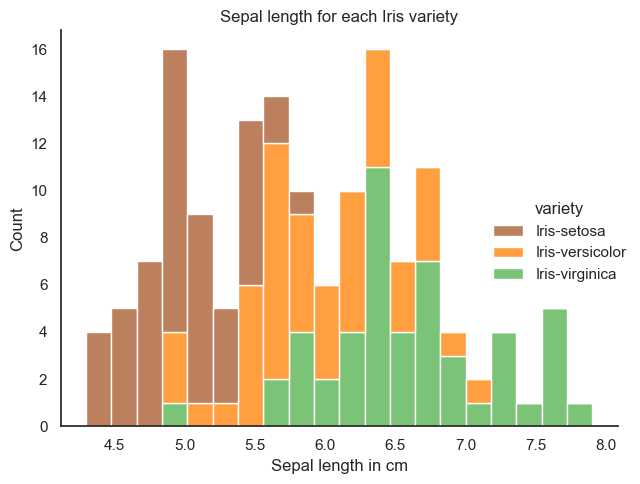

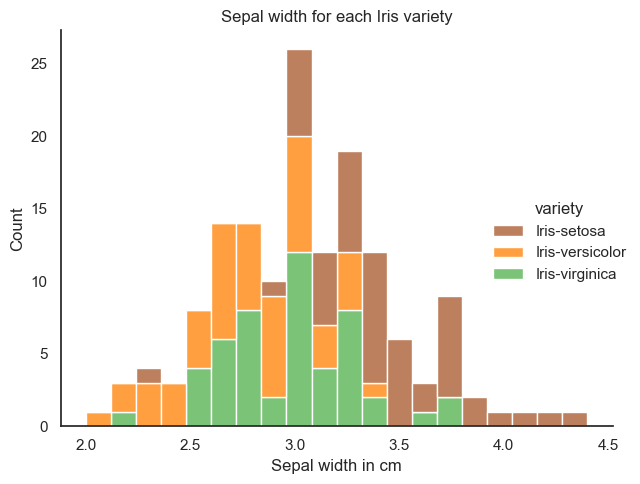

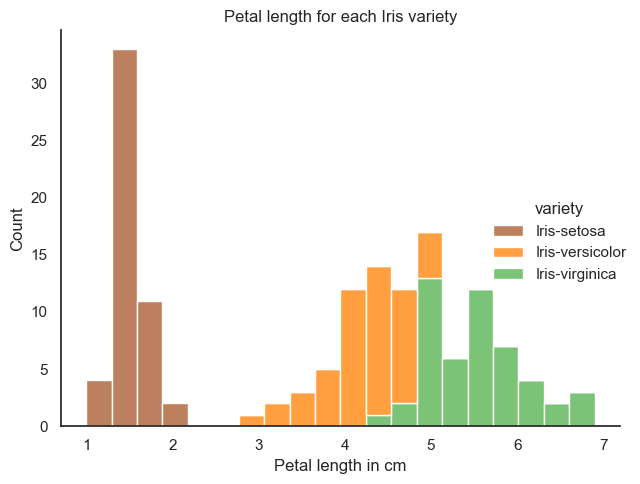

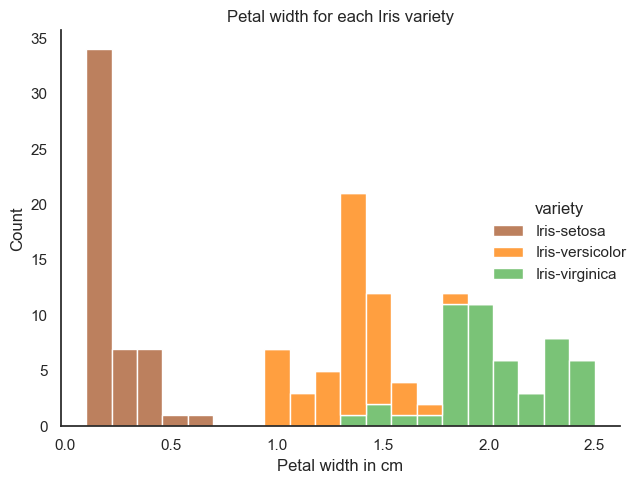

In [53]:
sns.set_theme(style="white")

sepal_length = sns.displot(df, x ="sepal length", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Sepal length for each Iris variety", xlabel = "Sepal length in cm")
plt.tight_layout()
plt.savefig('project_images/sepal_length_hist.png')

sepal_width = sns.displot(df, x ="sepal width", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Sepal width for each Iris variety", xlabel = "Sepal width in cm")
plt.tight_layout()
plt.savefig('project_images/sepal_width_hist.png')

petal_length = sns.displot(df, x ="petal length", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Petal length for each Iris variety", xlabel = "Petal length in cm")
plt.tight_layout()
plt.savefig('project_images/petal_length_hist.png')

petal_width = sns.displot(df, x ="petal width", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Petal width for each Iris variety", xlabel = "Petal width in cm")
plt.tight_layout()
plt.savefig('project_images/petal_width_hist.png')

The most obvious visual result from the histograms are the *much* smaller values for petal length and petal width for Iris setosa compared to Iris versicolor and Iris virginica. It is also clear that virginica has larger petals overall compared to versicolor.

In terms of sepal length and sepal width, the ranking of size from smallest to largest measurements (setosa < versicolor < virginica) holds for sepal length, albeit to a less marked degree than for either of the petal characteristics. However, for sepal width, it appears that setosa has the largest measurements overall, with the measurements for versicolor and virginica being noticeably lower, with virginica having slightly higher values for sepal width than versicolor overall.

### Scatterplots ###

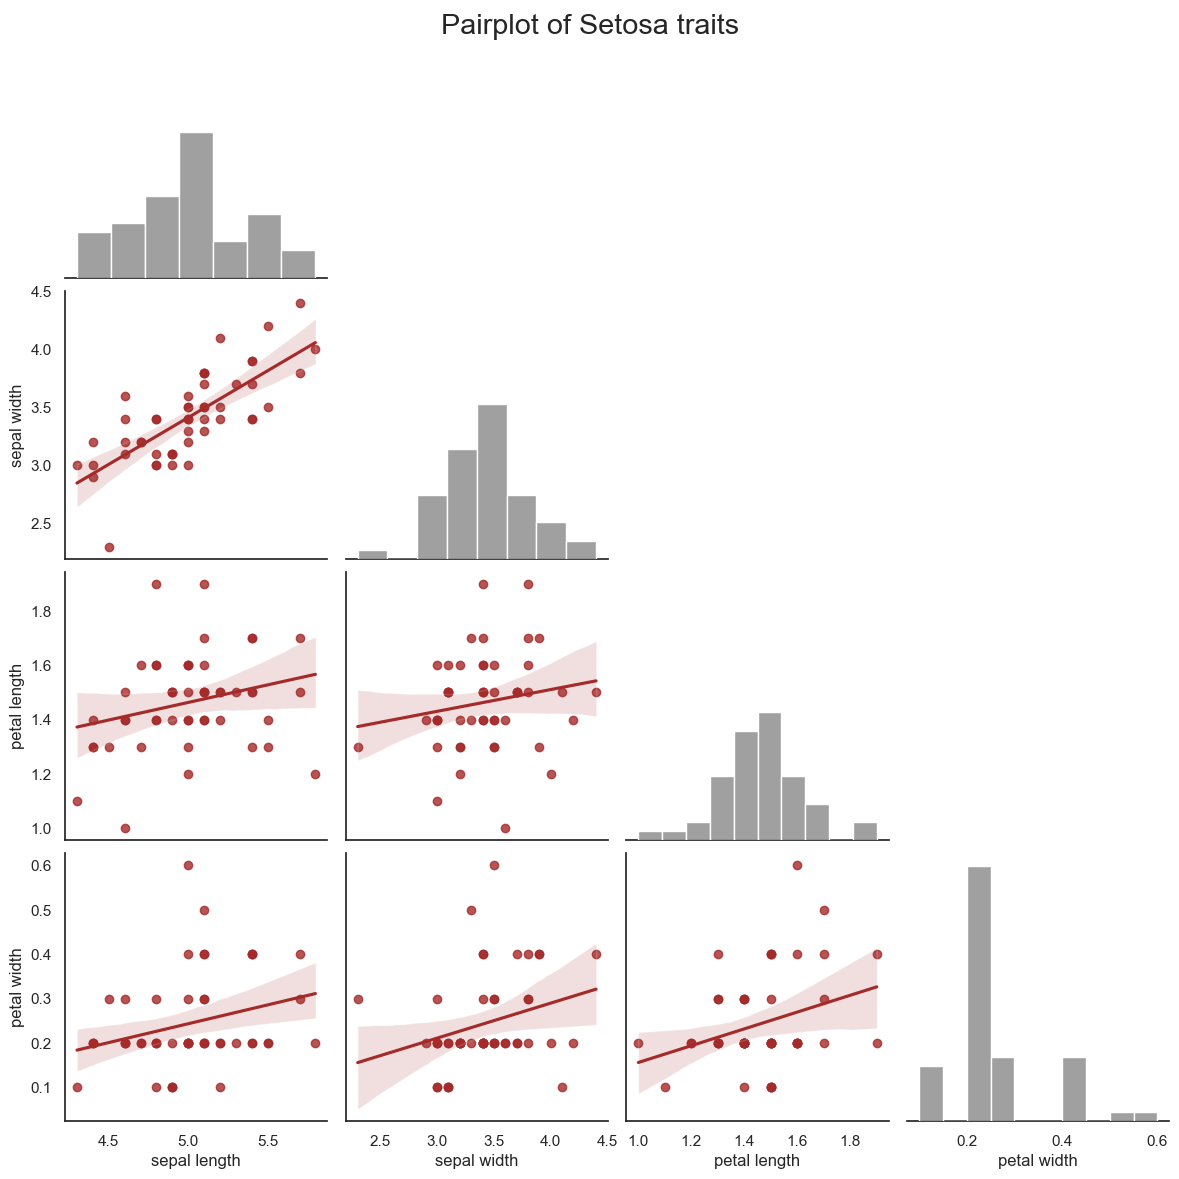

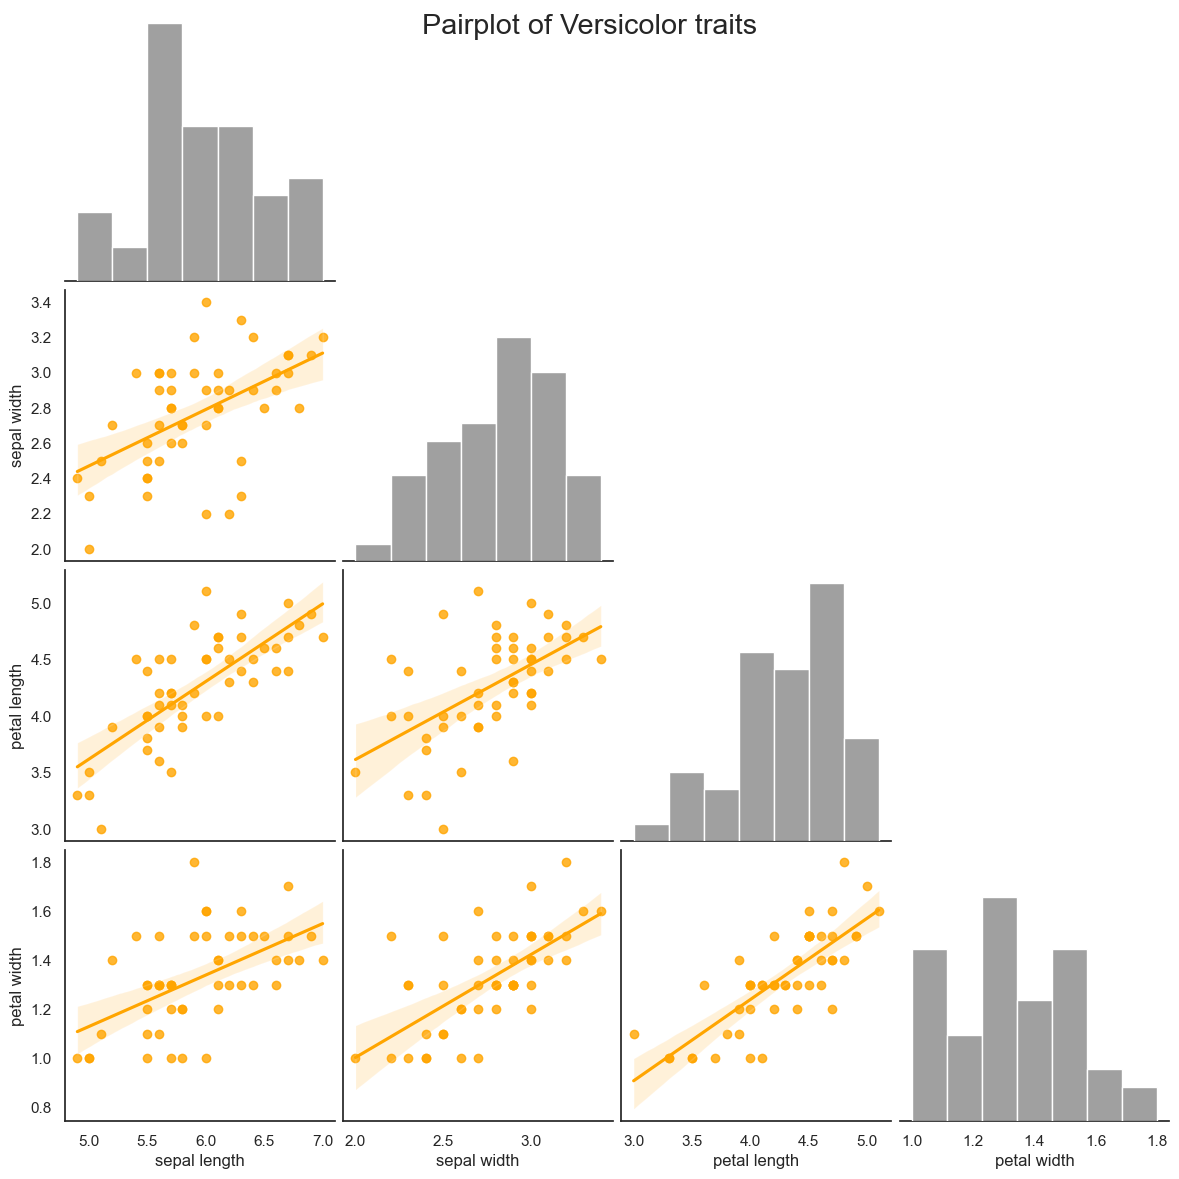

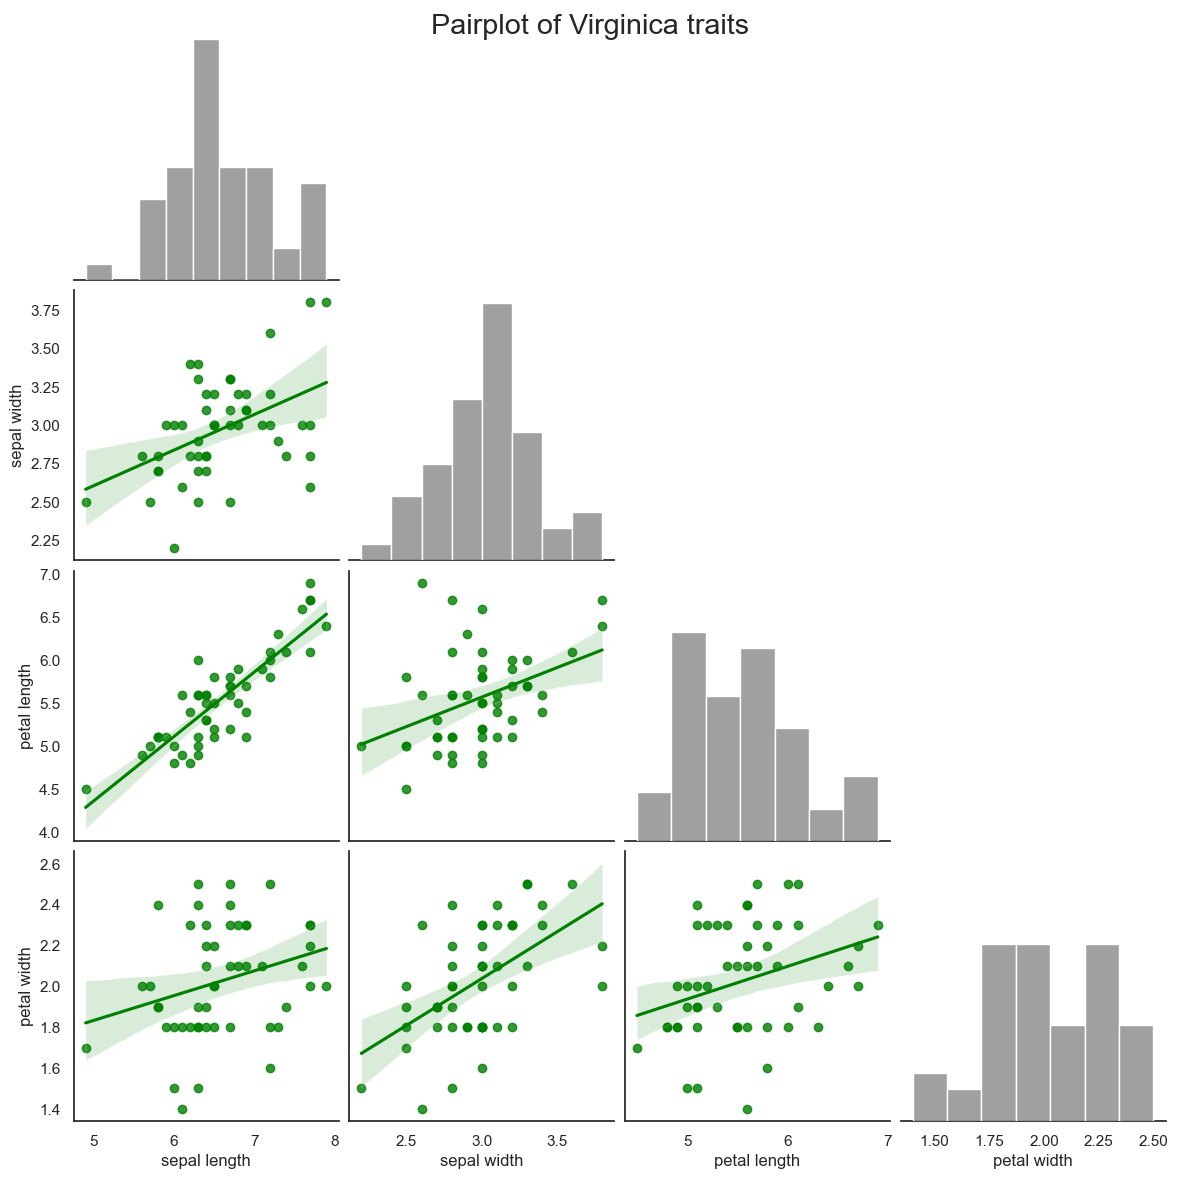

In [54]:
setosa_pairplot = sns.pairplot(df_setosa, diag_kws = dict(color='grey'), plot_kws = dict(color = 'brown'), height=3, aspect=1, corner=True, kind = "reg")
setosa_pairplot.fig.suptitle("Pairplot of Setosa traits", fontsize = "xx-large")
plt.savefig('project_images/setosa_pairplot.png')

versicolor_pairplot = sns.pairplot(df_versicolor, diag_kws=dict(color='grey'), plot_kws=dict(color = 'orange'),  height=3, aspect=1, corner=True, kind = "reg")
versicolor_pairplot.fig.suptitle("Pairplot of Versicolor traits", fontsize = "xx-large")
plt.savefig('project_images/versicolor_pairplot.png')

virginica_pairplot = sns.pairplot(df_virginica, diag_kws=dict(color='grey'), plot_kws=dict(color = 'green'), height=3, aspect=1, corner=True, kind ="reg")
virginica_pairplot.fig.suptitle("Pairplot of Virginica traits", fontsize = "xx-large")
plt.savefig('project_images/virginica_pairplot.png')

### References ###